Name : Prathik Jain G N                                                                                 
Mandatory Project : DML 1001

Dataset : Health_insurance_cost.xlsx

### Predicting Health Insurance Price for an individual or family

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.


Please address certain questions as you work on this project.


1. Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?    


2. If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?


3. Please aim to identify patterns in the data and important features that may impact an ML model.


4. Please perform multiple machine learning models, perform all required steps to check if there are any assumptions, and justify your model. Why is your model better than any other possible model? Please explain it by relevant cost functions and, if possible, by any graph.


#### Data analysis approach

What approach are you going to take to prove or disprove your hypothesis?

What feature engineering techniques will be relevant to your project?

Please justify your data analysis approach.

Identify essential patterns in your data using the EDA approach to justify your findings.


#### Machine learning approach

What method will you use for machine learning-based predictions of health insurance price?

Please justify the most appropriate model.

Please perform the necessary steps required to improve the accuracy of your model.

Please compare all models (at least four models). 

## Dataset description:

#### Variables in the dataset:

**age**: age of the primary beneficiary

**gender**: insurance contractor gender, female, male

**BMI**: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

**Children**: number of children covered by health insurance, number of dependents

**smoking_status**: smoking or not

**location**: tsmoking_statushe beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

**health_insurance_price**: individual medical costs billed by health insurance



### Target variable :

**health_insurance_price**: individual medical costs billed by health insurance

## 1. Data Exploration

In [413]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [414]:
# To import dataset
health_insurance_raw = pd.read_excel('Health_insurance_cost.xlsx')# reading dataset
health_insurance = health_insurance_raw.copy() #creating a copy of dataset

In [415]:
#Initial five rows
health_insurance.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [416]:
health_insurance.describe(include='all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [417]:
#Checking for empty cells
health_insurance.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [418]:
#Summary of data

health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [419]:
# checking for the unique values in health_insurance['age'] column
health_insurance['age'].unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., nan, 55., 22., 63., 26., 35., 24., 41.,
       38., 36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57.,
       29., 45., 54., 49., 47., 51., 42., 50., 39.])

In [420]:
# checking for the unique values in health_insurance['BMI'] column
health_insurance['BMI'].unique()

array([   nan, 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 27.36 , 33.66 , 24.7  , 25.935, 22.42 ,
       28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  , 32.01 ,
       27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285, 37.62 ,
       41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 , 24.795,
       31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115, 29.92 ,
       27.5  , 28.4  , 27.94 , 35.09 , 29.7  , 35.72 , 32.205, 28.595,
       49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975, 31.35 , 33.915,
      

In [421]:
#Type casting

health_insurance['gender'] = health_insurance['gender'].astype('category')
health_insurance['Children'] = health_insurance['Children'].astype('int64')
health_insurance['smoking_status'] = health_insurance['smoking_status'].astype('category')
health_insurance['location'] = health_insurance['location'].astype('category')

In [422]:
health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     1310 non-null   float64 
 1   gender                  1338 non-null   category
 2   BMI                     1315 non-null   float64 
 3   Children                1338 non-null   int64   
 4   smoking_status          1338 non-null   category
 5   location                1338 non-null   category
 6   health_insurance_price  1336 non-null   float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 46.3 KB


In [423]:
#Drop Duplicates

health_insurance.drop_duplicates()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


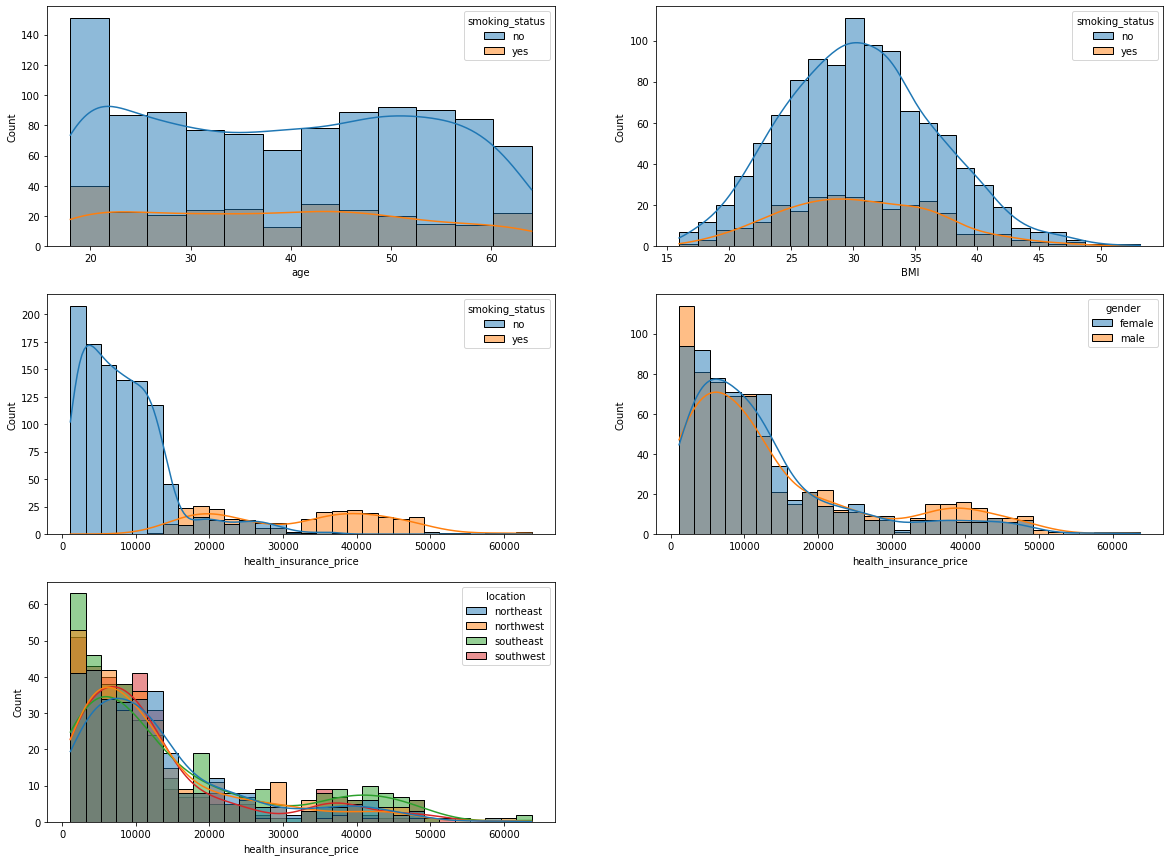

In [424]:
plt.figure(figsize=[20,15])
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)

sns.histplot(data= health_insurance, x='age', kde=True, ax=ax1,hue = 'smoking_status')
sns.histplot(data= health_insurance, x='BMI', kde=True, ax=ax2,hue = 'smoking_status')
sns.histplot(data= health_insurance, x='health_insurance_price', kde=True, ax=ax3,hue = 'smoking_status')
sns.histplot(data= health_insurance, x='health_insurance_price', kde=True, ax=ax4,hue = 'gender')
sns.histplot(data= health_insurance, x='health_insurance_price', kde=True, ax=ax5,hue = 'location')
plt.show()

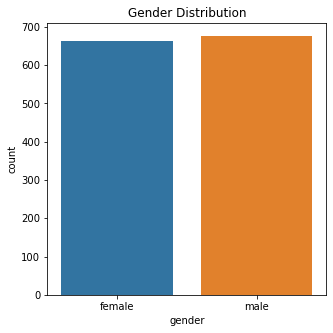

In [425]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=health_insurance)
plt.title('Gender Distribution')
plt.show()

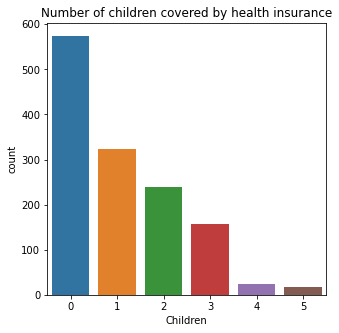

In [426]:
plt.figure(figsize=(5,5))
sns.countplot(x='Children', data=health_insurance)
plt.title('Number of children covered by health insurance')
plt.show()

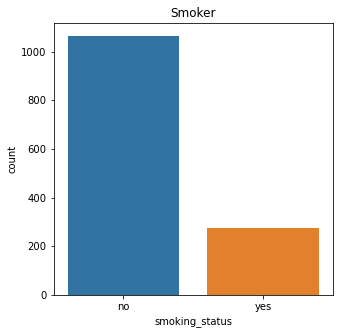

In [427]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoking_status', data=health_insurance)
plt.title('Smoker')
plt.show()

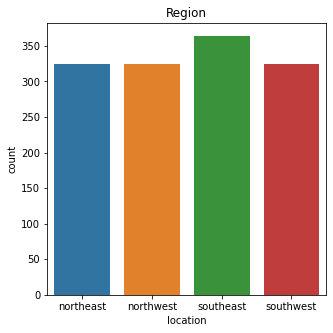

In [428]:
plt.figure(figsize=(5,5))
sns.countplot(x='location', data=health_insurance)
plt.title('Region')
plt.show()

In [429]:
#percentage of missing value

health_insurance.isnull().sum() * 100 / health_insurance.shape[0]

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

In [430]:
health_insurance.skew()

C:\Users\prath\AppData\Local\Temp\ipykernel_23160\3460303936.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



age                       0.057380
BMI                       0.299240
Children                  0.938380
health_insurance_price    1.517254
dtype: float64

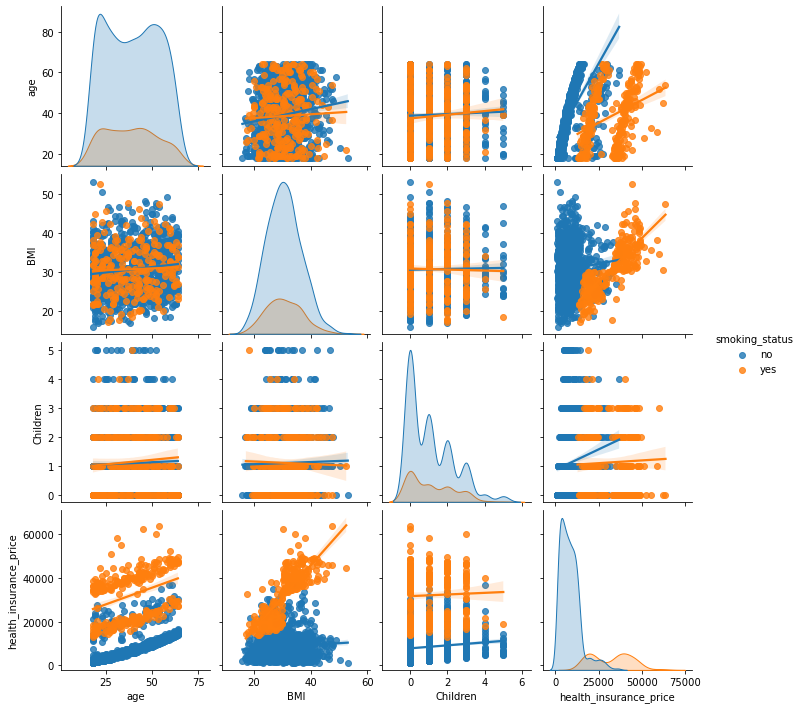

In [431]:
sns.pairplot(health_insurance,hue = 'smoking_status',kind = 'reg')

In [432]:
import plotly.figure_factory as ff
health_insurance_corr = health_insurance.corr(method='spearman') # Generate correlation matrix for spearman correlation

x = list(health_insurance_corr.columns)
y = list(health_insurance_corr.index)
z = np.array(health_insurance_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()

### Remark 

We can observe Age, Smoker and BMI is important factor in determining Health insurance price. Were as Gender and location didnt impact much on price.

- People who smoke were having higher BMI thus resulting in higher medical charges. Hence, they are charged higher. 
- Aged people with habit of smoking are also charged high.

In [433]:
health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     1310 non-null   float64 
 1   gender                  1338 non-null   category
 2   BMI                     1315 non-null   float64 
 3   Children                1338 non-null   int64   
 4   smoking_status          1338 non-null   category
 5   location                1338 non-null   category
 6   health_insurance_price  1336 non-null   float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 46.3 KB


In [434]:
# Dealing with categorical values
health_insurance_1 = pd.get_dummies(health_insurance,columns=['gender', 'smoking_status', 'location'])
health_insurance_1.drop(['gender_male','smoking_status_yes','location_southwest'],inplace=True,axis = 1)

In [435]:
health_insurance_1.head()

,age,BMI,Children,health_insurance_price,gender_female,smoking_status_no,location_northeast,location_northwest,location_southeast
0,19.0,NaN,0,16884.92400,1,0,0,0,0
1,18.0,33.770,1,1725.55230,0,1,0,0,1
2,28.0,33.000,3,4449.46200,0,1,0,0,1
3,33.0,22.705,0,21984.47061,0,1,0,1,0
4,32.0,28.880,0,3866.85520,0,1,0,1,0


In [436]:
#Imputation

from fancyimpute import KNN
knn_imputer = KNN()
health_insurance_knn = health_insurance_1.copy(deep=True)
health_insurance_knn.iloc[:, :] = knn_imputer.fit_transform(health_insurance_knn)

Imputing row 1/1338 with 1 missing, elapsed time: 0.167
Imputing row 101/1338 with 0 missing, elapsed time: 0.167
Imputing row 201/1338 with 0 missing, elapsed time: 0.167
Imputing row 301/1338 with 0 missing, elapsed time: 0.168
Imputing row 401/1338 with 0 missing, elapsed time: 0.168
Imputing row 501/1338 with 0 missing, elapsed time: 0.169
Imputing row 601/1338 with 0 missing, elapsed time: 0.169
Imputing row 701/1338 with 0 missing, elapsed time: 0.169
Imputing row 801/1338 with 0 missing, elapsed time: 0.170
Imputing row 901/1338 with 0 missing, elapsed time: 0.170
Imputing row 1001/1338 with 0 missing, elapsed time: 0.170
Imputing row 1101/1338 with 0 missing, elapsed time: 0.171
Imputing row 1201/1338 with 0 missing, elapsed time: 0.171
Imputing row 1301/1338 with 0 missing, elapsed time: 0.171


In [437]:
health_insurance_knn.skew()

age                       0.052237
BMI                       0.284200
Children                  0.938380
health_insurance_price    1.518254
gender_female             0.020951
smoking_status_no        -1.464766
location_northeast        1.205161
location_northwest        1.200409
location_southeast        1.025621
dtype: float64

In [438]:
health_insurance_knn.head()

,age,BMI,Children,health_insurance_price,gender_female,smoking_status_no,location_northeast,location_northwest,location_southeast
0,19.0,38.841501,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0
1,18.0,33.770000,1.0,1725.55230,0.0,1.0,0.0,0.0,1.0
2,28.0,33.000000,3.0,4449.46200,0.0,1.0,0.0,0.0,1.0
3,33.0,22.705000,0.0,21984.47061,0.0,1.0,0.0,1.0,0.0
4,32.0,28.880000,0.0,3866.85520,0.0,1.0,0.0,1.0,0.0


<AxesSubplot:ylabel='health_insurance_price'>

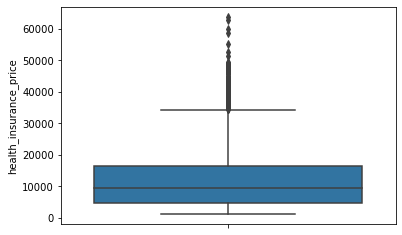

In [439]:
sns.boxplot(y=health_insurance_knn['health_insurance_price'])

In [440]:
health_insurance_knn['zscore_price'] = np.abs(stats.zscore(health_insurance_knn.health_insurance_price))
outlier = health_insurance_knn['zscore_price'] > 3
print(np.where(health_insurance_knn['zscore_price'] > 3))

(array([  34,  543,  577,  819, 1146, 1230, 1241, 1300], dtype=int64),)


In [441]:
health_insurance_new = health_insurance_knn[health_insurance_knn['zscore_price']<3]

In [442]:
health_insurance_new.drop('zscore_price',axis=1,inplace=True)

In [443]:
health_insurance_new.describe()

,age,BMI,Children,health_insurance_price,gender_female,smoking_status_no,location_northeast,location_northwest,location_southeast
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.00000,1330.000000,1330.000000,1330.000000
mean,39.151475,30.677570,1.096241,13005.332215,0.495489,0.80000,0.242857,0.242857,0.271429
std,13.956647,6.103858,1.206230,11655.641277,0.500168,0.40015,0.428971,0.428971,0.444864
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4724.369462,0.000000,1.00000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9296.016525,0.000000,1.00000,0.000000,0.000000,0.000000
75%,51.000000,34.600000,2.000000,16281.596250,1.000000,1.00000,0.000000,0.000000,1.000000
max,64.000000,53.130000,5.000000,48970.247600,1.000000,1.00000,1.000000,1.000000,1.000000


In [444]:
X = health_insurance_new.drop('health_insurance_price',axis = 1)
y = health_insurance_new.health_insurance_price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Feature Scaling

In [445]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.85659377, -1.07823339, -0.90606797, ..., -0.55853428,
        -0.56287804, -0.6092077 ],
       [ 0.73068242, -0.05365826, -0.90606797, ..., -0.55853428,
        -0.56287804, -0.6092077 ],
       [ 0.22564   ,  0.85523903,  0.76329363, ..., -0.55853428,
        -0.56287804, -0.6092077 ],
       ...,
       [-1.00089161, -1.62357177, -0.07138717, ..., -0.55853428,
        -0.56287804, -0.6092077 ],
       [ 0.87498026, -0.86340312, -0.90606797, ..., -0.55853428,
        -0.56287804, -0.6092077 ],
       [ 0.00919324, -1.11624182,  3.26733603, ..., -0.55853428,
        -0.56287804,  1.6414763 ]])

In [446]:
X_test=sc.transform(X_test)
X_test

array([[-1.43378512, -0.83778874, -0.07138717, ..., -0.55853428,
         1.7765838 , -0.6092077 ],
       [ 1.38002268,  3.04650778, -0.90606797, ..., -0.55853428,
        -0.56287804,  1.6414763 ],
       [ 0.78143617, -0.7973015 , -0.07138717, ..., -0.55853428,
        -0.56287804, -0.6092077 ],
       ...,
       [-1.43378512, -0.75929307, -0.07138717, ..., -0.55853428,
         1.7765838 , -0.6092077 ],
       [-1.43378512, -1.64009717, -0.90606797, ..., -0.55853428,
        -0.56287804, -0.6092077 ],
       [ 0.00919324, -0.71219566,  0.76329363, ..., -0.55853428,
         1.7765838 , -0.6092077 ]])

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [448]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [449]:
y_pred = linear_reg.predict(X_train)

In [450]:
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.7467755339368232


In [451]:
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7458192481888504


In [452]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 2.024138584396893e-12


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



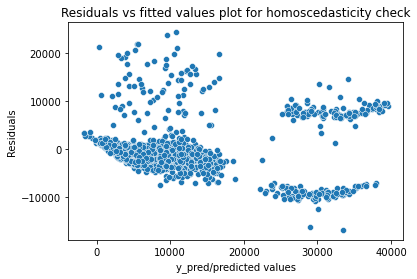

In [453]:
p = sns.scatterplot(y_pred, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2.6],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='health_insurance_price', ylabel='Density'>

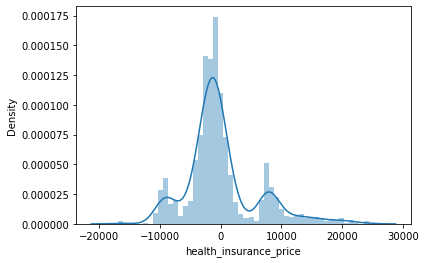

In [454]:
sns.distplot((y_train-y_pred),bins=50)

In [455]:
predictions = linear_reg.predict(X_test)

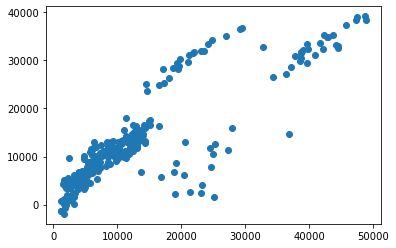

In [456]:
plt.scatter(y_test,predictions)

In [457]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4071.87065214009
MSE: 35299083.202583216
RMSE: 5941.3031569331


# Support Vector Machine (Regression)

In [458]:
#Importing SVM model
from sklearn import svm

#Creating a svr Regressor
regressor = svm.SVR()

#Train the model using the training sets
regressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regressor.predict(X_test)

In [459]:
y_pred = regressor.predict(X_test) # prediciting y

In [460]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8068.810286481138
MSE: 151630880.55442908
RMSE: 12313.849136416651


In [461]:

parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=regressor, param_grid=parameters, cv=10, verbose=4, n_jobs=-1,refit = True)
svr_grid.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=4)

In [462]:
# print best parameter after tuning
print(svr_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svr_grid.best_estimator_)

{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}
SVR(C=100, kernel='sigmoid')


In [463]:
#Creating a svr Regressor
regressor = svm.SVR(C=100, kernel='sigmoid')

#Train the model using the training sets
regressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regressor.predict(X_test)

In [464]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4128.4738409457905
MSE: 74501088.37925388
RMSE: 8631.401298703118


# Random Forest Regressor

In [465]:
# Importing library
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor_rf = RandomForestRegressor()
  
# fit the regressor with x and y data
regressor_rf.fit(X_train, y_train) 

RandomForestRegressor()

In [466]:
# performing prediction
y_pred = regressor_rf.predict(X_test)

In [467]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2958.8115992679486
MSE: 26547179.15245366
RMSE: 5152.395477101273


In [468]:
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [3,5,7,9],
             'min_samples_leaf': [5,7,10,12],
             'criterion': ['squared_error']}
reg_rf_gscv = GridSearchCV(estimator=regressor_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train, y_train.ravel())

In [469]:
# print best parameter after tuning
print(reg_rf_gscv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(reg_rf_gscv.best_estimator_)

{'criterion': 'squared_error', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 600}
RandomForestRegressor(max_depth=40, min_samples_leaf=10, min_samples_split=7,
                      n_estimators=600)


In [470]:
 # create regressor object
regressor_rf = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=9,
                      n_estimators=1200)
  
# fit the regressor with x and y data
regressor_rf.fit(X_train, y_train) 

# performing prediction
y_pred = regressor_rf.predict(X_test)

In [471]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2553.901000436056
MSE: 20403578.888027515
RMSE: 4517.032088443419


# XGBoost Regressor

In [472]:
X = health_insurance_new.drop('health_insurance_price',axis = 1)
y = health_insurance_new.health_insurance_price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [473]:
# we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [474]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, n_estimators = 10)

In [475]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [476]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6410.945456049695
MSE: 113453249.59413803
RMSE: 10651.44354508524


In [477]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xg_reg_gscv = GridSearchCV(estimator=xg_reg, param_grid=params, cv=10, n_jobs=-1)
xg_reg_gscv = reg_rf_gscv.fit(X_train, y_train.ravel())

In [478]:
# print best parameter after tuning
print(xg_reg_gscv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(xg_reg_gscv.best_estimator_)

{'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 1000}
RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1000)


In [479]:
xg_reg = xgb.XGBRegressor(max_depth=60, min_samples_leaf=12, min_samples_split=9,n_estimators=600)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

[01:02:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



In [480]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3102.568953062735
MSE: 32040534.240650468
RMSE: 5660.435870200321


# Conclusion

We built 4 models of regression to check which model predicts better with less error.

Error parameters considered were Mean Absolute Error, Mean Squarred Error, Root Mean Squared Error.

Models :

1. Linear Regression - RMSE: 5941.3031569331
2. Support Vector Machine (Regression) - RMSE: 8631.401298703118
3. Random Forest Regressor - RMSE: 4510.987261179289
4. XGBoost Regressor - RMSE: 5660.435870200321

From above it is clear that Random Forest Regressor - RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=9,n_estimators=1200) predicted better. 
